# Lab 2
## Using Python for Exploratory Data Analysis (EDA)

The first part of Lab2 is to go through a demo for EDA of a relatively clean tabular data called *Auto MPG data*. This data set comes from the UCI Machine Learning Data Repository (http://archive.ics.uci.edu/ml/) and can be found at http://archive.ics.uci.edu/ml/datasets/Auto+MPG. We provide a slightly modified version of this data set as file `cars.csv`.

To load this data set and pursue EDA, it is a good idea to use several popular Python packages, which come preloaded with the Anaconda software:
- pandas (http://pandas.pydata.org/) -- a library for data science
- numpy (http://www.numpy.org/) -- a library for data computations
- matplotlib (http://matplotlib.org/) -- a library for data visualization

The main feature of *pandas* is its `DataFrame` data structure that provides an intuitive way of handling tabular data. The main feature of *numpy* is its `array` data structure that represents matrices and allows us to perform matrix algebra operations. *matplotlib* allows visualizing data stored in `DataFrame` or `array` objects. 

As you will soon realize, each new Python library requires spending some time to learn about it. There are several nice tutorials that you can find on the web that get you started with the 3 libraries. A particularly great resource for learning about those libraries is your textbook *Python for Data Analysis*, so please take some time to browse its contents and try to run the code provided in it. When learning about the new libraries, you are best advised to jump in and immediatelly start tinkering with the code. The more time you spend using the library, the more you will uncover about all the great features and posibilities the library offers you.

Let us start by loading the 3 libraries in a particular way that many data scientists prefer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the following line allows ipython to display plots
%matplotlib inline  

In [2]:
print(plt.style.available)

plt.style.use('ggplot')

['Solarize_Light2', 'seaborn-dark-palette', 'seaborn-whitegrid', 'seaborn-talk', 'seaborn-pastel', 'grayscale', 'fast', 'seaborn-dark', 'seaborn-colorblind', 'ggplot', 'seaborn-white', 'seaborn-poster', 'seaborn-muted', 'seaborn-ticks', '_classic_test', 'seaborn-bright', 'fivethirtyeight', 'classic', 'bmh', 'seaborn-deep', 'seaborn-darkgrid', 'seaborn-paper', 'seaborn', 'dark_background', 'seaborn-notebook']


**Question 1**: What are we accomplishing with `as` reserved word?

**Answer**: Rename a library so it can be called with another name. In this case we can use plt instead of matplotlib.pyplot.

`cars.csv` is in an easy-to-read comma separated format and the following *pandas* functionality makes it easy to read it into a `DataFrame` object. 

In [3]:
# read this csv file, remember to put the full path to 
# the directory where you saved the data
df = pd.read_csv('cars.csv')  # df is DataFrame object
print (df.head())    # see the first 5 rows of the loaded table

                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433          12.0     70     US  
4    3449          10.5     70     US  


**Question 2**: How can you display the first 10 rows using method `head`? What are the types of each of the columns in `df`?

**Answer**: 
Display first 10 rows using 
```python
print(df.head(10))
```
Get types of each column using 
```python
print(df.dtypes)
```
The data in the columns contains both non-numeric and numeric data including nominal and ordinal data.

In [4]:
# Pass the number of rows desired into the df.head() function
print("First 10 rows:")
print(df.head(10))
print()
print("Type of each colummn:")
print(df.dtypes)

# Alternative method to get column types which contains more information about each column.
# print(df.info())

First 10 rows:
                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   
5           Ford Galaxie 500  15.0          8         429.0         198   
6           Chevrolet Impala  14.0          8         454.0         220   
7          Plymouth Fury iii  14.0          8         440.0         215   
8           Pontiac Catalina  14.0          8         455.0         225   
9         AMC Ambassador DPL  15.0          8         390.0         190   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  

There are different ways of exploring and indexing the table. Here are some examples.

In [5]:
print (list(df.columns))
print (df[0:5])         # print the first 5 rows, same outcome as df.head()
print (df[['Car', 'MPG']][:10])  # print the first 10 rows for selected columns
print (df[df['MPG'] > 40])   # using Boolean condition, print only cars with MPG > 40
print (df.iloc[[0,1,5],0:5])   # uses 'ix' indexing, selects rows and columns based on their location in the table

['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']
                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433          12.0     70     US  
4    3449          10.5     70     US  
                         Car   MPG
0  Chevrolet Chevelle Malibu  18.0
1          Buick Skylark 320  15.0
2         Plymouth Satellite  18.0
3              AMC Rebel SST  16.0
4                Ford Torino  1

**Question 3**: Show two ways of printing the last 5 rows of `df`. Print the names of the cars with 3 cilinders.

**Answer**:

In [6]:
# Print last 5 lines of df

# Method 1
print("Last 5 rows:")
print (df.tail(5))

# Method 2
print("\nLast 5 rows:")
print (df[-5:])

print("\nCars with 3 cilinders:")
# Print names of cars with 3 cilinders
# Method 1
# print(df[df['Cylinders']==3].Car)
# Method 2
print(df[df['Cylinders']==3]['Car'])


Last 5 rows:
                   Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
401    Ford Mustang GL  27.0          4         140.0          86    2790   
402  Volkswagen Pickup  44.0          4          97.0          52    2130   
403      Dodge Rampage  32.0          4         135.0          84    2295   
404        Ford Ranger  28.0          4         120.0          79    2625   
405         Chevy S-10  31.0          4         119.0          82    2720   

     Acceleration  Model  Origin  
401          15.6     82      US  
402          24.6     82  Europe  
403          11.6     82      US  
404          18.6     82      US  
405          19.4     82      US  

Last 5 rows:
                   Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
401    Ford Mustang GL  27.0          4         140.0          86    2790   
402  Volkswagen Pickup  44.0          4          97.0          52    2130   
403      Dodge Rampage  32.0          4         135.0          84    

Now, we are ready to start plotting the data.

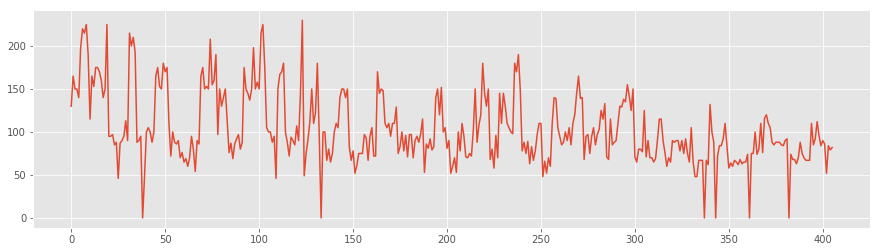

In [11]:
plt.figure(figsize=(15, 4))  # can control the size of the display
plt.plot(df['Horsepower'])      # display 'Model' attribute

**Question 4**: Plot *Horsepower* attribute, but only for the US cars. 

**Answer**:

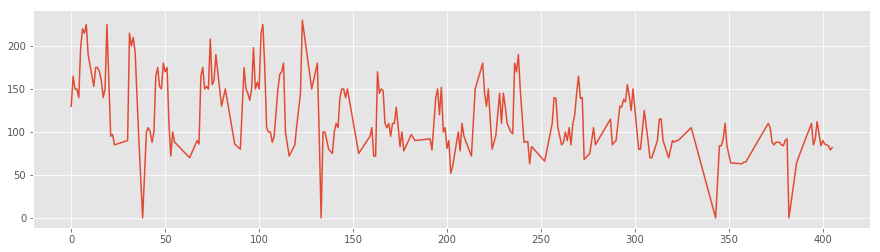

In [10]:
plt.figure(figsize=(15,4))
plt.plot(df[df['Origin'] == 'US']['Horsepower'])

To plot the histogram of a selected attribute:

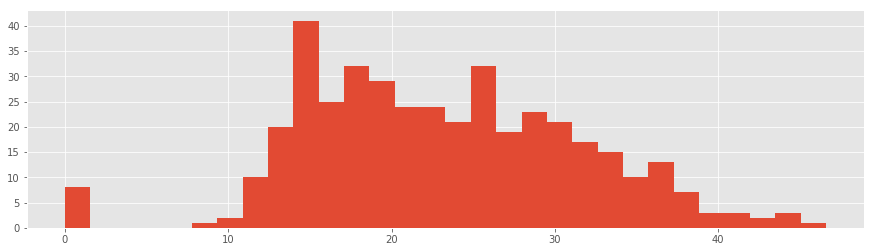

In [20]:
fig = plt.figure(figsize=(15,4))
plt.hist(df['MPG'], bins=30);   # ; suppresses Out
# plt.hist(df['Cylinders'], bins=20) 

**Question 5**: What can we conclude by looking at the histogram? Explain in one-two sentences. Figure out what is your preferred number of bins for *MPG* and *Cylinders* and argue why. 

**Answer**: As histograms are used to display the frequency of attribute values in intervals(bins), we can use it to see which MPG cars are the most common within the specific intervals. In this histogram with my perferred bins set to 30 as it distributes the data more without having it too loose, we can see that most cars have an MPG between 15 and 30. Also it sharply increases to 15 MPG, and then gradually decreases to 40 MPG. My preferred number of bins for cylinders is 5 since there are only 4 different numbers currently, and having 5 bins lets each cylinder number have its own bin.

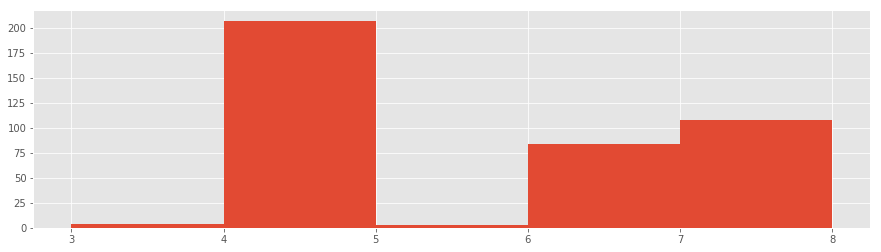

In [23]:
fig = plt.figure(figsize=(15,4))
plt.hist(df['Cylinders'], bins=5);   # ; suppresses Out
# plt.hist(df['Cylinders'], bins=20) 

The following code provides statistics for number of cylinders.

In [34]:
t = pd.crosstab(index=df["Cylinders"],  # Make a crosstab
                     columns="count")     # Name the count column
t['percentage']= (t/t.sum())*100
print (t)

col_0      count  percentage
Cylinders                   
3              4    0.985222
4            207   50.985222
5              3    0.738916
6             84   20.689655
8            108   26.600985


**Question 6**: Try to learn more about `crosstab` method (by doing Google search) and write a line of code that uses it in a different way on `df` data.

**Answer:**

In [35]:
# Displays Number of cars with specified MPG for each country
x = pd.crosstab(df["MPG"], df["Origin"])
print(x)

Origin  Europe  Japan  US
MPG                      
0.0          3      0   5
9.0          0      0   1
10.0         0      0   2
11.0         0      0   4
12.0         0      0   6
13.0         0      0  20
14.0         0      0  19
14.5         0      0   1
15.0         0      0  16
15.5         0      0   5
16.0         0      0  13
16.2         1      0   0
16.5         1      0   2
16.9         0      0   1
17.0         1      0   6
17.5         0      0   5
17.6         0      0   2
17.7         0      0   1
18.0         1      1  15
18.1         0      0   2
18.2         0      0   1
18.5         0      0   3
18.6         0      0   1
19.0         2      2   8
19.1         0      0   1
19.2         0      0   3
19.4         0      0   2
19.8         0      0   1
19.9         0      0   1
20.0         2      2   5
...        ...    ...  ..
34.1         0      2   0
34.2         0      0   1
34.3         1      0   0
34.4         0      0   1
34.5         1      0   1
34.7        

Horizontal bar plot:

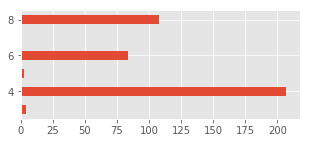

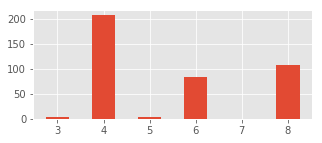

In [41]:
plt.figure(figsize=(5, 2))
plt.barh(t.index,t["count"], .5);
plt.figure(figsize=(5, 2))
plt.bar(t.index,t["count"], .5);

**Question 7**: How about a horizontal bar plot? Can you learn how to control the width of bars and make a plot that has thinner bars?

**Answer:**
Modify the width of a bar plot by adding a third parameter to bar() or barh() that is less than 1.

Pie chart:

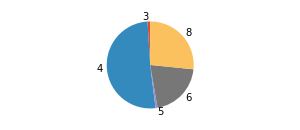

In [43]:
plt.figure(figsize=(5,2))
plt.axis("equal")
plt.pie(t["count"],labels=t.index,startangle=90);

**Question 8**: Do you prefer bar or pie displayed chart and why?

**Answer:**
I prefer the bar chart. Although they are both easy to visualize relationship to each other cylinder in frequency, the bar chart makes it more noticable that some cylinder counts are being skipped.

The following is a boxplot of MPG values for each of the model years. Pay attention that matplotlib is not used here. Instead, we called a panda `boxplot` method 

/home/hop/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


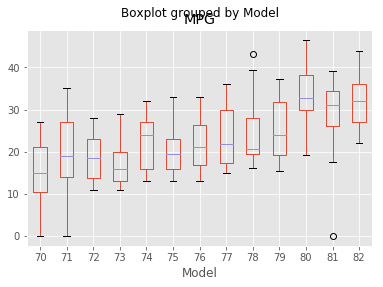

In [46]:
df.boxplot(column='MPG',by='Model');



**Question 9**: Discuss what can you learn from the displayed boxplot. Plot another boxplot using `df` data that you think is very useful and explain what can we learn from it?

**Answer**: Since boxplots display maximum, minimum, median, first quartile, and third quartile, the chart displays all of that information about its MPG as the model years increases.
In the chart below, it shows Horsepower vs Model as a boxplot. It shows that the general maximum horsepower was decreasing while the minimum horsepower stayed relatively the same.

/home/hop/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


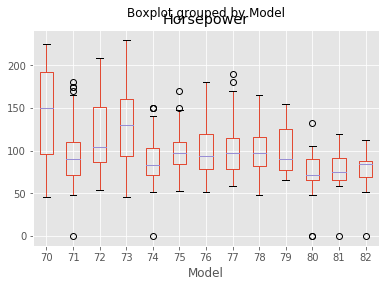

In [47]:
df.boxplot(column='Horsepower',by='Model');

Scatterplot between MPG and Weight attributes:

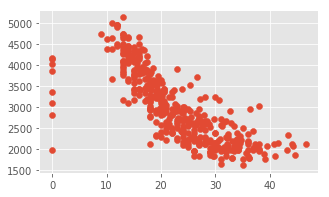

In [48]:
plt.figure(figsize=(5,3))
plt.scatter(df['MPG'],df['Weight']);

**Question 10**: Discuss what can we learn from the displayed scatterplot.  

**Answer:** The scatterplot shows a negative correlation between MPG and Weight. The lighter the car, the more likely it is to have a higher MPG.

We can decide on the size and collor of circles to represent some of data properties. Here, the size is proportional to Cylinders and color is related to Horsepower:

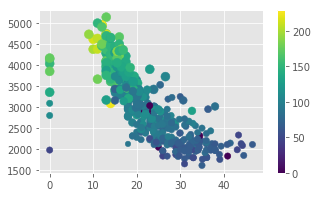

In [53]:
plt.figure(figsize=(5,3))
plt.scatter(df['MPG'],df['Weight'],df['Cylinders']*10,df['Horsepower']);
plt.colorbar()

**Question 11**: Discuss what additional insight we can get from this scatterplot as compared to the previous scatterplot. Plot another scatterplot by picking a different set of attributes that you think is providing a useful view at the data. Discuss what can be concluded from that plot.

**Answer:** This scatterplot also includes cylinders and horsepower using circle size and color respectively. Now the plot helps display that cars with more cylinders likely weight more and have more horsepower. The following scatterplot shows weight vs displacement, while also featuring MPG as size, and cylinders as color. We can see now that heavier cars have more cylinders and displacement, but less MPG.

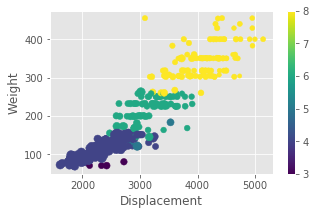

In [52]:
plt.figure(figsize=(5,3))
plt.scatter(df['Weight'],df['Displacement'],df['MPG']*2,df['Cylinders']);
plt.xlabel('Displacement')
plt.ylabel('Weight')
plt.colorbar()

Pandas `scatter_matrix` method allows us to plot all scatterplots for a data set (it would take a few seconds to display):

/home/hop/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


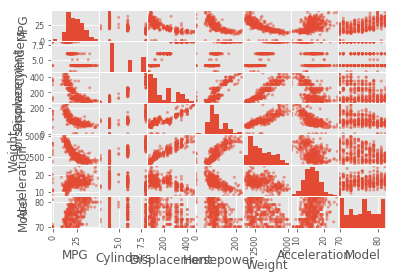

In [54]:
pd.scatter_matrix(df);

**Question 12**: Explain what are we seeing from this plot and discuss about the insights you obtained from it.

When you are done with running and playing with the code provided in this file and answering Questions 1-12, **submit** `.ipynb` file containing modifications of this file together with your answers and comments. Feel free to modify the provided code or produce new lines of code.

**Question 13**: Produce a 2 page word document titled "Exploratory Analysis of MPG Data Set". In this document you should combine your own discussion and figures produced by Python to provide a coherent story about the properties of the MPG data set and the most important and interesting insights about the data. You can feel free to frame your story around some known historical facts about the cars and U.S. and World economy during the 1970-1982 period. **Submit** the document as `.pdf` file.

**Answer 12**: The scatter_matrix() function is used to combine every pair of columns. It is useful to detect correlations between columns quickly as each possibility will be graphed. In cases where the same column would be compared, a histogram is featured in place of a scatterplot. From the overall picture it seems that at lease a quarter of the relationships have a clear positive or negative correlation between them. However, relationships with Model and MPG are harder to read since there is a greater variability in the data.

**Answer 13:**

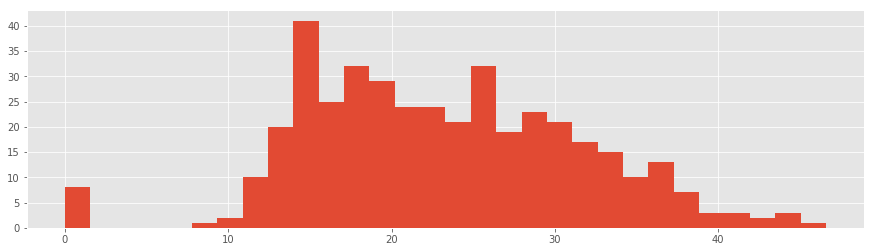

In [58]:
fig = plt.figure(figsize=(15,4))
plt.hist(df['MPG'], bins=30);   # ; suppresses Out

In [110]:
t = pd.crosstab(index=df["Cylinders"],  # Make a crosstab
                     columns="count")     # Name the count column
t['percentage']= (t/t.sum())*100
print (t)

col_0      count  percentage
Cylinders                   
3              4    0.985222
4            207   50.985222
5              3    0.738916
6             84   20.689655
8            108   26.600985


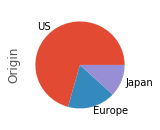

In [111]:
# USE as 1
t = df[df['Model']<73]
t['Origin'].value_counts().plot(kind='pie', figsize=(2,2))

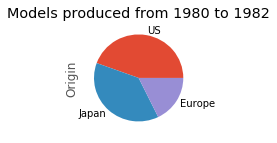

In [112]:
# USE as 2
t = df[df['Model']>79]
t['Origin'].value_counts().plot(kind='pie', figsize=(2,2), title="Models produced from 1980 to 1982")

/home/hop/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


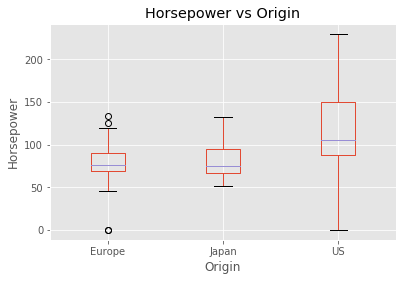

In [113]:
# Use as 3
# t = df[df['Model']<73]
plt.figure()
fig = df.boxplot(column='Horsepower', by='Origin')
plt.title("Horsepower vs Origin")
plt.ylabel("Horsepower")
plt.suptitle("")
plt.savefig('figout')

/home/hop/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

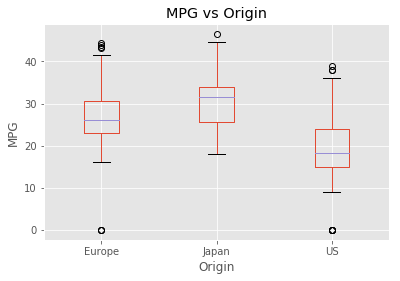

In [114]:
# Use as 4
# t = df[df['Model']<73]
plt.figure()
fig = df.boxplot(column='MPG', by='Origin')
plt.title("MPG vs Origin")
plt.ylabel("MPG")
plt.suptitle("")
# plt.savefig('figout')

/home/hop/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

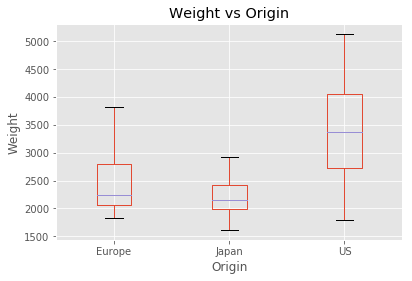

In [115]:
# Use as 4
# t = df[df['Model']<73]
plt.figure()
fig = df.boxplot(column='Weight', by='Origin')
plt.title("Weight vs Origin")
plt.ylabel("Weight")
plt.suptitle("")
# plt.savefig('figout')